In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import pandas as pd

(100, 1)
(100,)


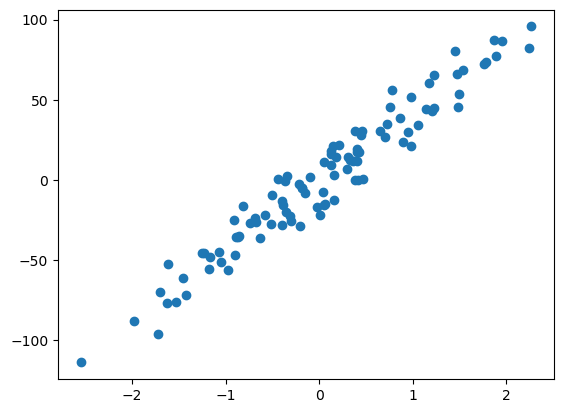

In [20]:
np.random.seed(0)
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y) 
print(x.shape)
print(y.shape)

In [21]:
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)


In [22]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


In [23]:
np.random.seed(0) 
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

In [24]:
def model(X, theta):
    return X.dot(theta)

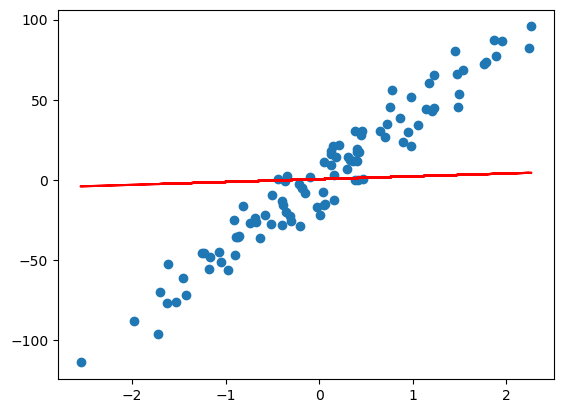

In [25]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

In [26]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
cost_function(X, y, theta)

905.6306841935502

In [27]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [28]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations) 
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) 
        cost_history[i] = cost_function(X, y, theta) 
    return theta, cost_history

In [29]:
n_iterations = 2000
learning_rate = 0.01
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
theta_final 

array([[42.61943019],
       [-0.81418173]])

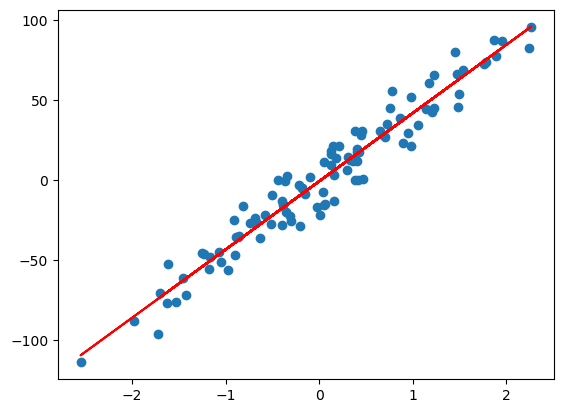

In [30]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

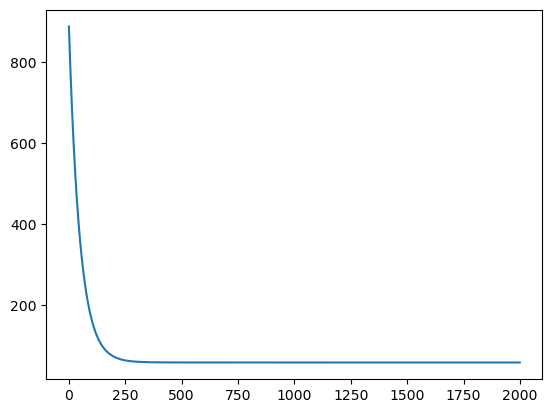

In [31]:
plt.plot(range(n_iterations), cost_history)

In [32]:
data = pd.read_csv('./archive/housing.csv')
data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


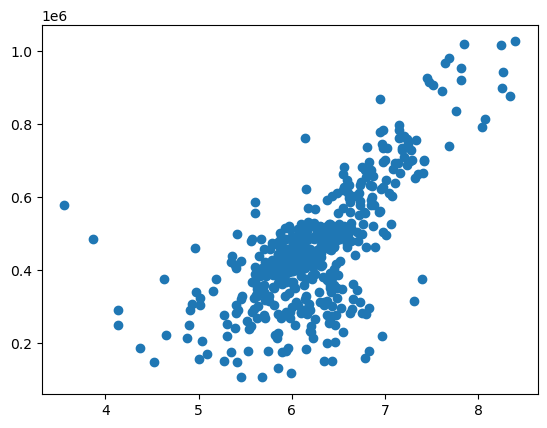

In [33]:
x=data[['RM']]
y=data[['MEDV']]
plt.scatter(x,y)

In [34]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(489, 2)


In [35]:
np.random.seed(0) 
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

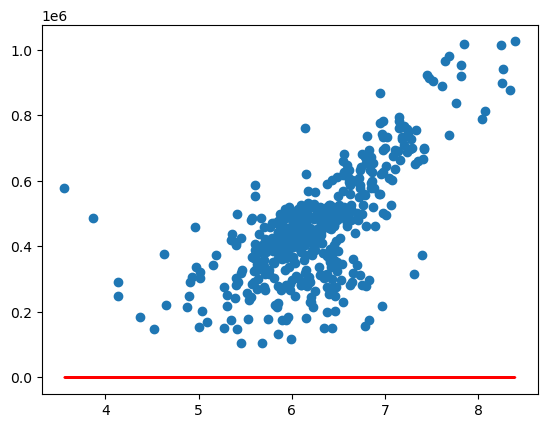

In [36]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

In [37]:
cost_function(X, y, theta)

C:\Users\acer\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


MEDV    1.168492e+11
dtype: float64

In [38]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
print(theta_final) 

C:\Users\acer\AppData\Local\Temp\ipykernel_71784\3896446559.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cost_history[i] = cost_function(X, y, theta)


[[  91916.26848409]
 [-113608.15336459]]


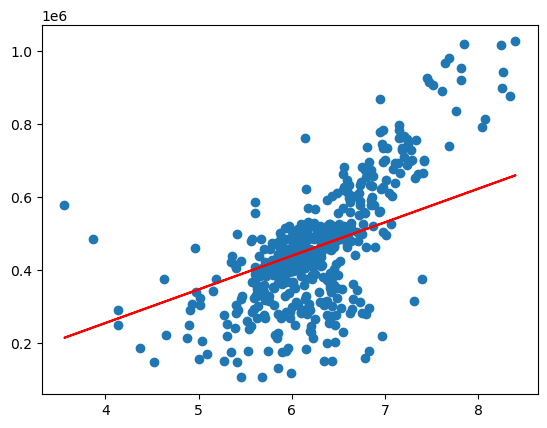

In [39]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso , RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['MEDV']), data['MEDV']/10000, test_size=0.2, random_state=42)

In [42]:
simpleLR = LinearRegression()
simpleLR.fit(X_train[['RM']], y_train)
y_pred_lr = simpleLR.predict(X_test[['RM']])


print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

MSE: 133.6242368616902
R²: 0.3919980373501617


In [43]:
X_test

,RM,LSTAT,PTRATIO
451,5.926,18.13,20.2
84,6.389,9.62,18.5
434,6.655,17.73,20.2
472,5.414,23.97,20.1
428,6.459,23.98,20.2
...,...,...,...
317,5.868,9.97,16.9
376,6.193,15.17,20.2
56,6.383,5.77,17.3
275,6.230,12.93,18.2


In [61]:
multipleLR = LinearRegression()
multipleLR.fit(X_train, y_train)
y_pred_mlr = multipleLR.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_mlr))
print("R²:", r2_score(y_test, y_pred_mlr))
print("coef:",multipleLR.coef_)


MSE: 67.89025559265889
R²: 0.6910934003098512
coef: [ 8.73222036 -1.06206373 -1.93244103]


In [51]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [59]:
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_test_poly)

print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R²:", r2_score(y_test, y_pred_poly))
print("coef:",poly_lr.coef_)


MSE: 39.92883256094269
R²: 0.8183203202238079
coef: [ 0.00000000e+00  1.49379464e+01  3.45808534e+00  2.06071964e+01
  2.70256428e+00 -4.20603261e-01 -1.91976579e+00  2.63325703e-03
 -1.14001353e-01 -2.41922808e-01]


In [57]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\nLasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R²:", r2_score(y_test, y_pred_lasso))
print("coef:",lasso.coef_)




Lasso Regression:
MSE: 69.54845836399413
R²: 0.6835484326967769
coef: [ 5.42503037 -1.24860652 -1.81819963]


In [55]:

ridge = RidgeCV(alphas=[0.1,1.0,10])
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))
print("coef:",ridge.coef_)


MSE: 67.85800084783368
R²: 0.6912401622193601
coef: [ 8.0028799  -1.10283026 -1.94367352]


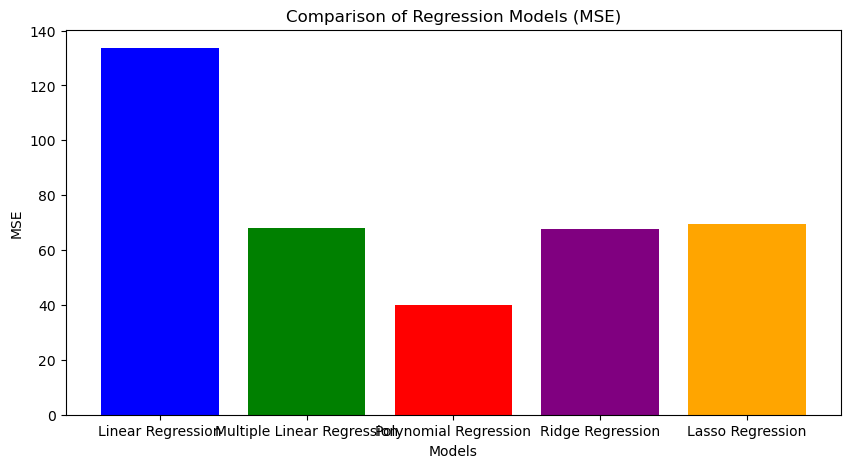

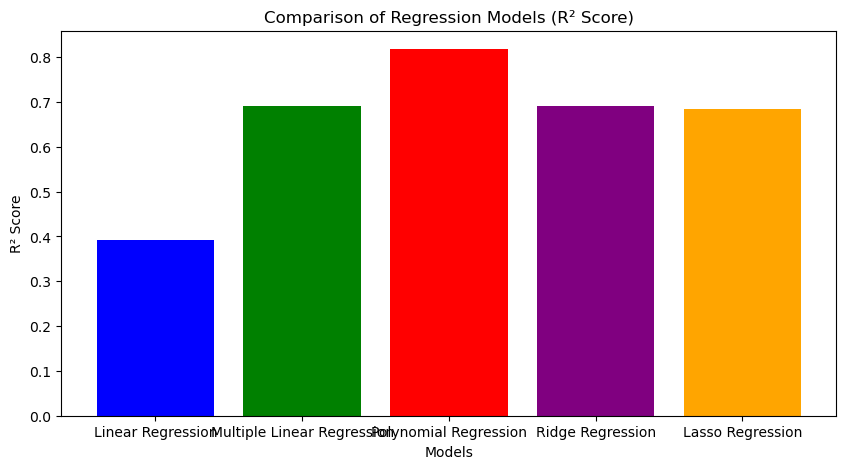

In [63]:
# Comparison of models
models = ['Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
mse_values = [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_mlr), mean_squared_error(y_test, y_pred_poly), mean_squared_error(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_lasso)]
r2_values = [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_mlr), r2_score(y_test, y_pred_poly), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso)]

# Plot comparison
plt.figure(figsize=(10,5))
plt.bar(models, mse_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("Comparison of Regression Models (MSE)")
plt.show()

plt.figure(figsize=(10,5))
plt.bar(models, r2_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Comparison of Regression Models (R² Score)")
plt.show()
